In [1]:
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('heart.csv',usecols=['age','chol'])
df.head()

,age,chol
0,52,212
1,53,203
2,70,174
3,61,203
4,62,294


**Clustering using SOM**

In [3]:
som_shape=(1,3)
data = df.values  

som = MiniSom(som_shape[0],som_shape[1],data.shape[1],sigma=0.5,learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 1000)

**Visualize the clusters**

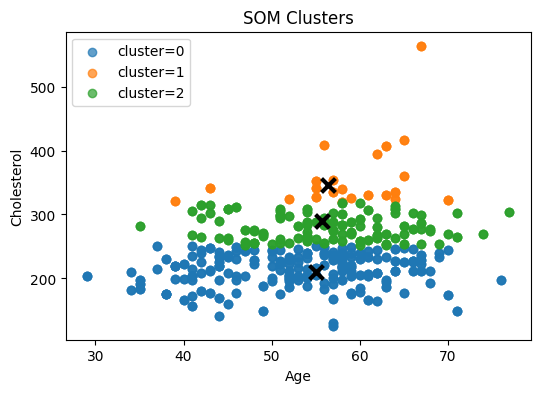

In [4]:
winner_coordinates = np.array([som.winner(x) for x in data])

cluster_index = np.ravel_multi_index(winner_coordinates.T, (som_shape[0],som_shape[1]))

plt.figure(figsize=(6, 4))
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index==c,0],data[cluster_index==c,1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0],centroid[:, 1],marker='x',s=100,linewidths=3,color='k') 

plt.title("SOM Clusters")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()